# **Descrição**

Esse projeto da disciplina **IF697 — Introdução à Ciência dos Dados** foi desenvolvido por **Anderson César de Carvalho Silva** (accs2) utilizando [dados](https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks) de músicas do Spotify disponibilizadas na plataforma Kaggle.

Ele foi dividido em 4 partes principais:
1. **Imports e Data Frame.** 
Contém a importação dos dados e bibliotecas utilizados além de um pequena descrição dos dados contidos no dataframe. 
2. **Pré-Processamento.**
Contém o tratamento e a normalização dos dados apresentados.
3. **Análise e Visualização.**
Apresenta um estudo sobre os dados através da análise das visualizações.
4. **Teste de Hipotese.** É o local onde foram realizados os testes de hipotese para comparação de valores de categorias.

# **Imports e Data Frame**

## Importando Bibliotecas

In [ ]:
import pandas as pd
import datetime as dt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

## Importando Data Frame

In [ ]:
spotify = pd.read_csv("https://raw.githubusercontent.com/Acesarsilva/Spotify_Data_Analysis/main/Data/data.csv",encoding = "ISO-8859-1")

In [ ]:
spotify.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [ ]:
len(spotify)

174389

## Descrição dos Dados

**1. acousticness**

Uma medida de confiança de 0,0 a 1,0 para saber se a faixa é acústica. 1.0 representa alta confiança de que a faixa é acústica. 

**2. artists**

Vozes dos artistas que estão presentes na música. Pode haver mais de um artista por música.

**3. 	danceability**

Danceability descreve se uma faixa é adequada para dançar com base em uma combinação de elementos musicais, incluindo andamento, estabilidade do ritmo, intensidade da batida e regularidade geral. Um valor de 0,0 é menos dançante e 1,0 é mais dançante.

**4. duration_ms**

É a duração total da música em milissegundos.

**5. energy**

Energy é uma medida de 0,0 a 1,0 e representa uma medida perceptual de intensidade e atividade. Normalmente, as faixas energéticas parecem rápidas, altas e barulhentas.

**6. explicit**

Valor booleano que indica se determinada faixa contém conteúdo explicito.

**7. id**

Identificador de faixa gerado pelo próprio Spotify.

**8. instrumentalness**

Prevê se uma faixa não contém vocais. Quanto mais próximo o valor da instrumentalidade estiver de 1,0, maior será a probabilidade de a faixa não conter conteúdo vocal. Valores acima de 0,5 destinam-se a representar faixas instrumentais, mas a confiança é maior à medida que o valor se aproxima de 1,0.

**9. key**

Representa a análise harmônica da faixa através da Pitch Class Notation. Ex. musicas tocadas no campo hamônico de Ré (D) apresentam o valor 2, Dó (C) o valor 0 e etc. Existem 12 possiveis valores para key (0 - 11)

**10. liveness**

Detecta a presença de um público na gravação. Valores de liveness mais altos representam um aumento na probabilidade de a trilha ter sido executada ao vivo. Um valor acima de 0,8 fornece uma forte probabilidade de que a faixa esteja ao vivo.

**11. loudness**

O volume geral de uma faixa em decibéis (dB). Os valores típicos variam entre -60 e 0 db.

**12. mode**

Mode é uma análise harmômica da faixa que identifica se a escala da música é uma escala do tipo Maior (1) ou Menor (0).

**13. name**

String com o nome da faixa

**14. popularity**

Popularidade da música tendo como base os assinates do Spotify nos EUA.

**15. release_date**

Data de lançamento da faixa.

**16. speechiness**	

A fala detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente falada for a gravação (por exemplo, talk show, audiolivro, poesia), mais próximo de 1,0 será o valor do atributo.

**17. tempo**

O ritmo geral de uma faixa estimado em batidas por minuto (BPM).

**18. valence**

Uma medida de 0,0 a 1,0 que descreve a positividade musical transmitida por uma faixa. Quando mais proximo de 1,0 for o valor maior é a chance da faixa conter sentimentos como felicidade, alegria ou euforia.

**19. year**

Ano de lançamento da música

# **Pré-Processamento**

## Verificando Dados Ausentes

In [ ]:
spotify.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

**Dado o resultado, podemos ver que não existem dados ausentes neste dataset**

## Tratando Dados Duplicados

In [ ]:
#Verificando
spotify[spotify.duplicated()]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
9525,0.56700,['Neil Diamond'],0.515,180253,0.6410,0,1BmVQ5RGqqtF5cnsv6cQYu,0.064200,5,0.3220,-5.573,1,"Girl, You'll Be A Woman Soon",60,1968,0.0272,109.558,0.655,1968
9534,0.02710,['Neil Diamond'],0.560,163907,0.8270,0,2SS3WeSe24ZqTlTSK4KzQZ,0.002850,8,0.0551,-4.157,1,Cherry Cherry,54,1968,0.0306,84.383,0.904,1968
16113,0.97400,"['Johann Strauss II', 'Riccardo Muti', 'Wiener...",0.219,459053,0.0855,0,5zZbXSRIFe1uWNmEM7f2XI,0.922000,0,0.3550,-19.703,0,"FrÃ¼hlingsstimmen, Walzer, Op. 410",34,2021-01-08,0.0404,171.849,0.156,2021
16663,0.35500,"['Waylon Jennings', 'Willie Nelson']",0.626,184267,0.4570,0,0sFq478LIo9BFwf2qzMzzF,0.000009,4,0.0668,-13.785,1,The Year 2003 Minus 25 - Remastered,43,1978-01-01,0.0384,102.166,0.474,1978
16669,0.20200,['Ten Years After'],0.384,224133,0.5160,0,19HjHUjCfDrEYhVSIKG6nK,0.180000,9,0.1140,-12.032,0,I'd Love to Change the World - 2004 Remaster,60,1971-11-11,0.0345,118.129,0.371,1971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174380,0.04840,"['Stephan F', 'YA-YA']",0.693,177148,0.8260,0,1Cbf6PLWsL4s51eFepXx6L,0.000012,1,0.2310,-2.669,1,Only Tonight - Radio Edit,0,2020-12-25,0.0762,126.049,0.361,2020
174382,0.14100,"['BigBankCarti', 'Keyvo400']",0.544,215014,0.4070,1,3ASGdyWXeXsXtOIWtm0tv4,0.000000,4,0.2530,-12.745,0,LayUp,0,2020-12-31,0.2330,129.750,0.490,2020
174384,0.00917,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,147615,0.8660,0,46LhBf6TvYjZU2SMvGZAbn,0.000060,6,0.1780,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.186,2020
174386,0.80600,['Roger Fly'],0.671,218147,0.5890,0,48Qj61hOdYmUCFJbpQ29Ob,0.920000,4,0.1130,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.714,2020


**Existem dados duplicados que devem ser removidos.**

In [ ]:
#Removendo
spotify.drop_duplicates(keep= 'first', inplace= True)
len(spotify)

172230

## Trabalhando Definição de Tipos

In [ ]:
#Verificando
spotify.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

**Devo alterar variaveis que são do tipo object para evitar futuras dificuldades**

### *Tratando artists*

**Tranformando artists em Dados Categoricos**

In [ ]:
spotify['artists'] = spotify['artists'].astype('category')
spotify['artists'].cat.categories

Index(['["'In The Heights' Original Broadway Company", 'Mandy Gonzalez']',
       '["'Til Tuesday"]', '["100 First Songs' Participants"]',
       '["AKA ChaP in 00'S"]', '["Adolescent's Orquesta"]',
       '["Aidan O'Rourke", 'Kit Downes']', '["Alan Davey's Eclectic Devils"]',
       '["Alex D'Elia", 'Nihil Young']', '["Alexander 'Skip' Spence"]',
       '["Alexander O'Neal", 'Cherrelle']',
       ...
       '['é³éºæ¯']', '['é ç°æ¯åª']', '['é«åç¾']', '['é³³é£é£']',
       '['é»åæº']', '['é»è±¹']', '['é¾è©©å']', '['ê¹ìì² ']',
       '['ê¹í¨ê·¼', 'Quinever í¸ìë²']', '['ì¡°ì í']'],
      dtype='object', length=36195)

### *Tratando id*

**Transformando id em Dados Categoricos**

In [ ]:
spotify['id'] = spotify['id'].astype('category')
spotify['id'].cat.categories

Index(['000G1xMMuwxNHmwVsBdtj1', '000Npgk5e2SgwGaIsN3ztv',
       '000ZxLGm7jDlWCHtcXSeBe', '000jBcNljWTnyjB4YO7ojf',
       '000mGrJNc2GAgQdMESdgEc', '000py0jh5yT85aczhQ9QQQ',
       '000u1dTg7y1XCDXi80hbBX', '000x2qE0ZI3hodeVrnJK8A',
       '0012iPKNQl1zhdYwq3iVa1', '00147h65HDYSncB3byziPP',
       ...
       '7zxRMhXxJMQCeDDg0rKAVo', '7zxUtz2BCbKohJpOcwNNRX',
       '7zxikeAavSLQVGocbK2nau', '7zxiwcqLQyWcLdThrsYklu',
       '7zxmX2NsbCBNlqHBmkyWxs', '7zxv7kFipfmvpDiC1eU4Fb',
       '7zyMIkp9d6JIu368q6PL2U', '7zzbPkvxJ6iANIxcSz60rm',
       '7zzbfi8fvHe6hm342GcNYl', '7zzuPsjj9L3M7ikqGmjN0D'],
      dtype='object', length=172230)

### *Tratando name*

**Tranformando artists em Dados Categoricos**

In [ ]:
spotify['name'] = spotify['name'].astype('category')
spotify['name'].cat.categories

Index(['"40"', '"40" - Live', '"40" - Remastered 2008', '"45"',
       '"A" You're Adorable',
       '"Addio, mio dolce amor!" from Edgar (Act III) - Voice',
       '"Amarilli mia bella" - 1955 Version',
       '"Amarilli, mia bella" - 1953 Version',
       '"B" Movie Box Car Blues - Live', '"Buckwheat"',
       ...
       'ëª»ë¤í ê½íì¡ì´', 'ë¹ì²ë¼ ìì
ì²ë¼',
       'ìí´ ë³µ New Year's Luck - Freakrichxin Remix',
       'ìí´ ë³µ New Year's Luck - Original Mix Remastered 2018',
       'ìí´ ë³µ New Year's Luck - Sauna MIX', 'ìë
',
       'ìë
ì ìë¡í´ì¤ From Boys to Men 2013',
       'ìë¦¬ ìë¦¬ Sorry, Sorry', 'ì ì¸ë§ë¤ê¸°',
       'í

 ë¹ ë§ì Empty Heart'],
      dtype='object', length=137013)

### *Tratando release_date*

**Transformando release_date em datetime**

In [ ]:
spotify['release_date'] = pd.to_datetime(spotify['release_date'], infer_datetime_format= True)
spotify.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920-01-01,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920-01-01,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [ ]:
spotify.dtypes

acousticness               float64
artists                   category
danceability               float64
duration_ms                  int64
energy                     float64
explicit                     int64
id                        category
instrumentalness           float64
key                          int64
liveness                   float64
loudness                   float64
mode                         int64
name                      category
popularity                   int64
release_date        datetime64[ns]
speechiness                float64
tempo                      float64
valence                    float64
year                         int64
dtype: object

## Normalizando Dados

**11. loudness**

Como ele contém números em sua maioria negativos, para uma maior facilidade, iremos normalizar essa coluna de dados.

In [ ]:
spotify['loudness'].describe()

count    172230.000000
mean        -11.777780
std           5.690105
min         -60.000000
25%         -14.935750
50%         -10.867000
75%          -7.532000
max           3.855000
Name: loudness, dtype: float64

In [ ]:
spotify['loudness'] = MinMaxScaler().fit_transform(spotify[['loudness']])

In [ ]:
spotify['loudness'].describe()

count    172230.000000
mean          0.755183
std           0.089110
min           0.000000
25%           0.705728
50%           0.769446
75%           0.821674
max           1.000000
Name: loudness, dtype: float64

## Buscando e Tratando Outliers

### *Z-Score (Univariado)*

**16. loudness**

In [ ]:
spotify['loudness'].describe()

count    172230.000000
mean          0.755183
std           0.089110
min           0.000000
25%           0.705728
50%           0.769446
75%           0.821674
max           1.000000
Name: loudness, dtype: float64

In [ ]:
spotify = spotify[spotify['loudness'] > 0]

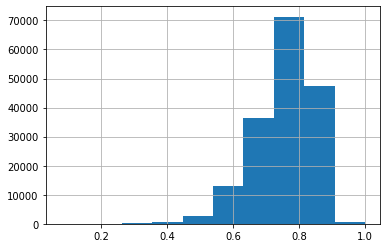

In [ ]:
spotify['loudness'].hist()

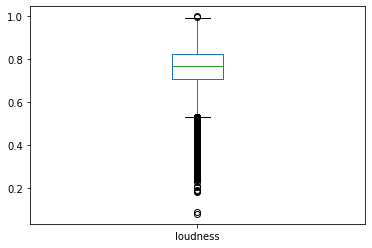

In [ ]:
spotify['loudness'].plot.box()

**Parcialmente simetrico, é possivel se aplicar o Z-Score.**

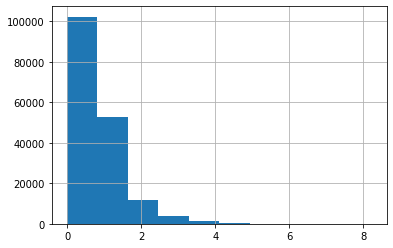

In [ ]:
mad = abs(spotify['loudness'] - spotify['loudness'].median()).median()*(1/0.6745)
(abs(spotify['loudness'] - spotify['loudness'].median())/mad).hist()

In [ ]:
spotify[abs(spotify['loudness'] - spotify['loudness'].median())/mad > 3.75]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
95,0.983,['Gustavo Obligado'],0.2120,451500,0.014800,1,2lPgRiJE3LXsi9ABxNNVnV,0.727000,2,0.6990,0.419904,0,Descuernacabras (Live),0,1920-01-01,0.0434,76.734,0.03990,1920
137,0.984,['Gustavo Obligado'],0.1570,444377,0.015100,1,44J1CFMxIyTPlevcDghAsk,0.860000,7,0.0402,0.370918,0,Ravel Ravel (Live),0,1920-01-01,0.0494,70.169,0.07730,1920
229,0.505,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.2330,686664,0.008170,0,0yxeAe7MlS0UWZVdNZVZWw,0.000203,8,0.1090,0.355321,1,Raja Manggala,3,1921-01-01,0.0305,108.143,0.18500,1921
246,0.849,"['Sergei Rachmaninoff', 'Yuri Temirkanov', 'St...",0.0663,537733,0.025700,0,1xGx91Ks3RQFqyam0Fdrky,0.956000,6,0.0709,0.452055,0,"No. 14, Vocalise",1,1921-01-01,0.0472,74.282,0.03480,1921
260,0.653,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.7270,301357,0.011600,0,2X6BN8RXjr4ArIEhjGa6QV,0.000038,3,0.2040,0.423475,0,Tedhak Saking,1,1921-01-01,0.2200,132.413,0.23100,1921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173201,0.961,['Deep Sleep Music Collective'],0.1280,122410,0.000793,0,2IOK9ETnjo05WJYbuEg8uI,0.933000,1,0.1080,0.347647,1,Moonbeam,63,2016-11-07,0.0505,77.394,0.03500,2016
173281,0.956,['Deep Sleep Music Collective'],0.1320,121104,0.001570,0,2nvvKQCQdiTlgTwRQCqnkx,0.964000,4,0.0983,0.348446,1,Sleeping Music (Calm Sleep),62,2016-11-07,0.0530,71.505,0.03760,2016
173439,0.996,['Empty Fields'],0.1670,200694,0.263000,0,7lVgv8KhBQHbmbQrxpVEKM,0.937000,8,0.1010,0.246167,0,Aero Noise,61,2017-05-07,0.0649,140.616,0.00001,2017
173853,0.877,['WNX'],0.1490,200000,0.254000,0,4WIupOFPnMTMYf3DVBbQ62,0.965000,1,0.1110,0.334837,1,Lo-Air,67,2019-04-26,0.0728,137.110,0.06780,2019


**São audios que em sua maioria são trilhas sonoras ou sons ambientes, devem ser removidos.**

In [ ]:
spotify = spotify[abs(spotify['loudness'] - spotify['loudness'].median())/mad < 3.75]

### *Razão de Duas Váriaveis (Bivariado)*

**4. duration_ms x 16. speechiness**

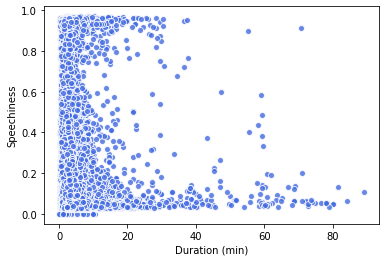

In [ ]:
plt.scatter(spotify['duration_ms']/60000, spotify['speechiness'], c= 'royalblue',edgecolors='white',alpha=0.8)
plt.ylabel("Speechiness")
plt.xlabel("Duration (min)")
plt.show()

In [ ]:
#Criando coluna duration
spotify['duration'] = spotify['duration_ms']/60000

In [ ]:
spotify = spotify[spotify['speechiness'] > 0]

In [ ]:
spotify['speech_per_min'] = spotify['speechiness']/spotify['duration']
spotify['speech_per_min'].describe()

count    171116.000000
mean          0.040503
std           0.101366
min           0.000420
25%           0.009176
50%           0.013546
75%           0.025088
max           3.731626
Name: speech_per_min, dtype: float64

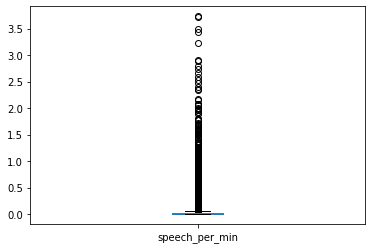

In [ ]:
spotify['speech_per_min'].plot.box()

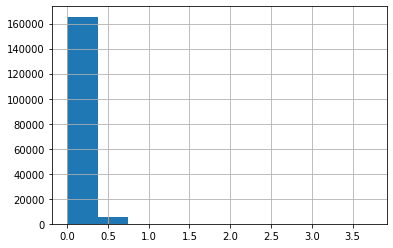

In [ ]:
spotify['speech_per_min'].hist()

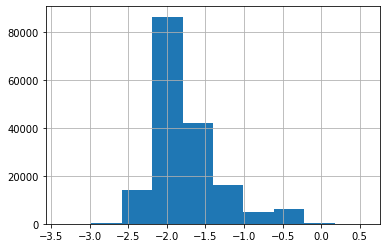

In [ ]:
spotify['speech_per_min_log'] = np.log10(spotify['speech_per_min'])
spotify['speech_per_min_log'].hist()

**Distribuição é razoavelmente simetrica**

In [ ]:
mad = abs(spotify['speech_per_min_log'] - spotify['speech_per_min_log'].median()).median()*(1/0.6745)
print(mad)

0.29983023438901313


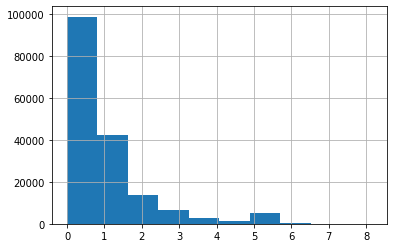

In [ ]:
(abs(spotify['speech_per_min_log']-spotify['speech_per_min_log'].median())/mad).hist()

In [ ]:
spotify[abs(spotify['speech_per_min_log']-spotify['speech_per_min_log'].median())/mad >= 4.9]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration,speech_per_min,speech_per_min_log
189,0.394000,['OsamaBeenLeanin'],0.367,20167,0.555,1,5VIYNqIf3f8dYKZLiC8LfX,0.1340,11,0.669,0.810007,1,SideRaq Osama (Intro),0,1920-11-23,0.168,80.428,0.589,1920,0.336117,0.499826,-0.301181
357,0.797000,['Fernando Pessoa'],0.695,98200,0.263,0,021ht4sdgPcrDgSk7JTbKY,0.0000,0,0.148,0.592968,1,CapÃ­tulo 2.16 - Banquero Anarquista,0,1922-06-01,0.957,102.009,0.655,1922,1.636667,0.584725,-0.233048
364,0.794000,['Fernando Pessoa'],0.676,99100,0.235,0,0OYGe21oScKJfanLyM7daU,0.0000,11,0.210,0.588098,0,CapÃ­tulo 2.8 - Banquero Anarquista,0,1922-06-01,0.960,96.777,0.724,1922,1.651667,0.581231,-0.235651
365,0.578000,['Fernando Pessoa'],0.750,132700,0.229,0,0PE42H6tslQuyMMiGRiqtb,0.0000,2,0.314,0.593892,1,CapÃ­tulo 2.25 - Banquero Anarquista,0,1922-06-01,0.955,102.629,0.531,1922,2.211667,0.431801,-0.364716
369,0.754000,['Fernando Pessoa'],0.687,96600,0.198,0,0cC9CYjLRIzwchQ42xVnq6,0.0000,4,0.197,0.559643,0,CapÃ­tulo 1.23 - Banquero Anarquista,0,1922-06-01,0.962,78.453,0.478,1922,1.610000,0.597516,-0.223651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173954,0.000265,['Andrew Bayer'],0.710,31386,0.699,0,19pjh0a99CIhA2GZr7RxUT,0.0191,6,0.504,0.856393,0,Voltage Control (FYHYM2019),3,2020-01-05,0.236,130.021,0.733,2020,0.523100,0.451157,-0.345673
174128,0.772000,['DJ X-Change'],0.620,30250,0.475,0,7iqCw8dAglSWcXXne7RBlf,0.0000,0,0.508,0.811526,1,New Years Eve Ultimate Countdown 2020,8,2019-12-16,0.541,93.056,0.321,2019,0.504167,1.073058,0.030623
174166,0.572000,['English Languagecast'],0.731,32373,0.173,0,6XZMbNo7U3cHmiwsQRdySD,0.0000,5,0.124,0.736512,0,The Year 2020 Changed Everything in My Life,6,2021-01-03,0.872,90.527,0.390,2021,0.539550,1.616162,0.208485
174311,0.615000,['Jazmine Sullivan'],0.659,60347,0.326,0,5d4Qhq6PfU30fooeIpAZjp,0.0000,8,0.183,0.716451,1,Rashida's Tale,60,2021-01-08,0.503,116.004,0.569,2021,1.005783,0.500108,-0.300936


**Em sua grande maioria são livros, podcasts e transmissões, devem ser removidos.**

In [ ]:
spotify = spotify[abs(spotify['speech_per_min_log']-spotify['speech_per_min_log'].median())/mad < 4.9]

In [ ]:
spotify = spotify.drop(columns=['speech_per_min_log','speech_per_min','duration'])

### *Isolation Forests (Multivariado)*

In [ ]:
spotify.dtypes

acousticness               float64
artists                   category
danceability               float64
duration_ms                  int64
energy                     float64
explicit                     int64
id                        category
instrumentalness           float64
key                          int64
liveness                   float64
loudness                   float64
mode                         int64
name                      category
popularity                   int64
release_date        datetime64[ns]
speechiness                float64
tempo                      float64
valence                    float64
year                         int64
dtype: object

**Removendo dados categoricos**

In [ ]:
artists = spotify['artists']
id = spotify['id']
name = spotify['name']
release_date = spotify['release_date']
spotify = spotify.drop(columns=['artists','id','name',"release_date"])

In [ ]:
rng = np.random.RandomState(42)
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(spotify)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples=100, n_estimators=100,
                n_jobs=None,
                random_state=RandomState(MT19937) at 0x7FF7397D0C00, verbose=0,
                warm_start=False)

In [ ]:
scores = clf.predict(spotify)
spotify['outlier'] = scores

**Desfazendo alterações**

In [ ]:
spotify['artists'] = artists
spotify['id'] = id
spotify['name'] = name
spotify['release_date'] = release_date

In [ ]:
spotify[spotify['outlier'] == -1]

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,outlier,artists,id,name,release_date
1,0.643000,0.852,150200,0.5170,0,0.026400,5,0.0809,0.825918,0,7,0.0534,86.889,0.9500,1920,-1,"[""Screamin' Jay Hawkins""]",0hbkKFIJm7Z05H8Zl9w30f,I Put A Spell On You,1920-01-05
3,0.000173,0.730,422087,0.7980,0,0.801000,2,0.1280,0.825135,1,17,0.0425,127.997,0.0422,1920,-1,['Oscar Velazquez'],19Lc5SfJJ5O1oaxY0fpwfh,True House Music - Xavier Santos & Carlos Gomi...,1920-01-01
4,0.295000,0.704,165224,0.7070,1,0.000246,10,0.4020,0.845102,0,2,0.0768,122.076,0.2990,1920,-1,['Mixe'],2hJjbsLCytGsnAHfdsLejp,Xuniverxe,1920-10-01
9,0.006820,0.571,476304,0.7530,0,0.873000,8,0.0920,0.830898,1,0,0.0446,126.993,0.1190,1920,-1,['Meetya'],06NUxS2XL3efRh0bloxkHm,Broken Puppet - Original Mix,1920-01-01
10,0.952000,0.688,150067,0.2200,0,0.000000,6,0.2620,0.701464,0,0,0.8450,82.024,0.4140,1920,-1,['Dorville'],07jrRR1CUUoPb1FLfSy9Jh,Oouin,1920-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174369,0.995000,0.297,349200,0.0287,0,0.908000,8,0.0995,0.469689,1,0,0.0564,141.636,0.0678,2021,-1,"['Ludovico Einaudi', 'Johannes BornlÃ¶f']",2LeqqwzobL5ktfQhWA3bHh,Nuvole bianche,2021-01-23
174371,0.995000,0.343,206700,0.0165,0,0.878000,9,0.0774,0.455485,0,0,0.0455,126.970,0.1510,2021,-1,"['Ludovico Einaudi', 'Johannes BornlÃ¶f']",3Glmyv3hbGGTgeR3FZrxJA,Una Mattina,2021-01-23
174373,0.966000,0.269,424200,0.0926,0,0.890000,9,0.0992,0.559392,0,0,0.0609,120.323,0.1020,2021,-1,"['Ludovico Einaudi', 'Johannes BornlÃ¶f']",4yBReaKJW78ZYCHpc1cfaK,Divenire,2021-01-23
174375,0.988000,0.316,303333,0.0573,0,0.879000,3,0.1200,0.561882,1,0,0.0515,81.070,0.0373,2021,-1,"['Ludovico Einaudi', 'Johannes BornlÃ¶f']",6QGVWUbmlePAiY5zJjfCmT,Night,2021-01-23


**Dado ao número de outliers encontrados pude observar que eles não são poucos e não são variados. O que me leva a buscar um outro tipo de abordagem que talvez encaixe melhor que o Isolation Forests.**

In [ ]:
spotify = spotify.drop(columns=['outlier'])

### *Local Outlier Factor (Multivariado)*

**Removendo dados categoricos**

In [ ]:
artists = spotify['artists']
id = spotify['id']
name = spotify['name']
release_date = spotify['release_date']
spotify = spotify.drop(columns=['artists','id','name',"release_date"])

In [ ]:
clf = LocalOutlierFactor(n_neighbors=10)
scores = clf.fit_predict(spotify)
spotify['outlier'] = scores

**Desfazendo alterações**

In [ ]:
spotify['artists'] = artists
spotify['id'] = id
spotify['name'] = name
spotify['release_date'] = release_date

In [ ]:
spotify[spotify['outlier'] == -1]

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,outlier,artists,id,name,release_date
22,0.08080,0.389,774360,0.810,0,0.918000,1,0.3320,0.765296,1,0,0.1090,161.322,0.071,1920,-1,['Tr0ma'],0RdLX7r5HrPOGQabZIjCfi,Big Rip,1920-01-01
37,0.00744,0.737,225707,0.328,0,0.000002,0,0.0765,0.645212,1,0,0.0526,172.025,0.798,1920,-1,['Ron van der Kraan'],0gIniSwikXODTBupqYPCI1,Sweat (A La La La La Long),1920-01-03
55,0.43500,0.680,88696,0.939,0,0.879000,6,0.0924,0.854154,1,0,0.0649,183.958,0.924,1920,-1,['No.Losiento'],1Bn6okAC9ntFOhKnsJPZkG,Playground Sparks,1920-01-01
67,0.21900,0.609,247678,0.322,0,0.848000,1,0.1230,0.740099,0,0,0.0359,154.044,0.292,1920,-1,['Konbeatz'],1bzr8IhTopsIKToYnjIyTS,Airplanes,1920-04-20
71,0.04030,0.666,257313,0.914,0,0.731000,7,0.0982,0.875311,1,0,0.0305,127.016,0.759,1920,-1,['Gianni Negro'],1vRn5VowmIoCNOyuy9GIm6,Big White - Radio Edit,1920-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174083,0.08040,0.771,148927,0.526,1,0.000000,1,0.6630,0.832449,1,70,0.0718,104.036,0.182,2020,-1,"['Ty Dolla $ign', 'JhenÃ© Aiko', 'Mustard']",1psvnQxSDdIKTDM2Jm8QKt,By Yourself (feat. JhenÃ© Aiko & Mustard),2020-10-23
174253,0.21200,0.785,239493,0.881,0,0.000000,8,0.7540,0.873777,0,0,0.0505,113.999,0.728,2021,-1,['Don Omar'],5dMBxRcKCnJpTWxGgNL4XO,Virtual Diva,2021-01-22
174267,0.09510,0.857,181333,0.855,0,0.000102,7,0.0443,0.859635,1,0,0.1340,95.016,0.798,2021,-1,"['Don Omar', 'Tego Calderon']",612viEXUeK8z63ExQz3Al0,Sandunga,2021-01-22
174275,0.21000,0.786,239493,0.884,0,0.000000,8,0.7540,0.873792,0,0,0.0496,113.991,0.728,2021,-1,['Don Omar'],6CovYcYrysJDssssOpSfk8,Virtual Diva,2021-01-22


In [ ]:
spotify = spotify[spotify['outlier'] == 1]

**Removendo Outliers**

In [ ]:
spotify = spotify.drop(columns=['outlier'])

# **Análise e Visualização dos Dados**

## Desenvolvimento dos Parâmetros ao Longo dos Anos

### **7. id**

In [ ]:
spotify.groupby('year')['id'].count()

year
1920     322
1921     142
1922      70
1923     180
1924     220
        ... 
2017    2009
2018    2460
2019    2143
2020    3488
2021    1333
Name: id, Length: 102, dtype: int64

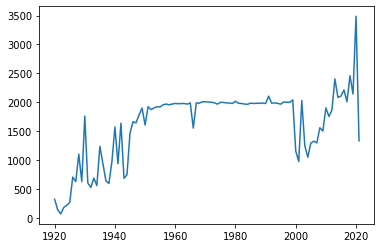

In [ ]:
plt.plot(spotify.groupby('year')['id'].count())

**A tendência é que cada vez mais faixas sejam produzidas por ano.** 

Como há uma grande discrepância entre o número de faixas por ano, a melhor abordagem para se observar o desenvolvimento dos próximos parâmetros ao longo dos anos é utilizando a média daquele mesmo ano.

### **1. acousticness**

In [ ]:
spotify['acousticness'].describe()

count    164305.000000
mean          0.499560
std           0.381543
min           0.000000
25%           0.085300
50%           0.519000
75%           0.898000
max           0.996000
Name: acousticness, dtype: float64

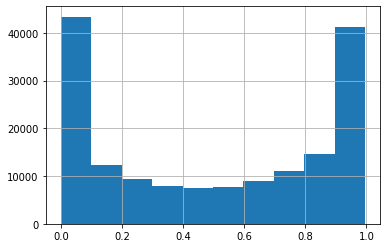

In [ ]:
spotify['acousticness'].hist()

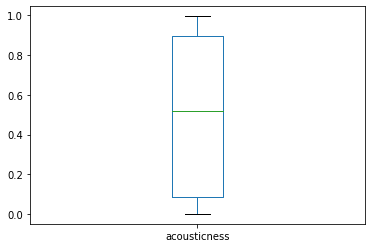

In [ ]:
spotify['acousticness'].plot.box()

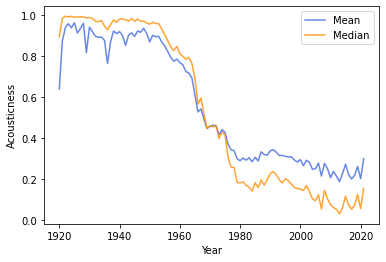

In [ ]:
plt.plot(spotify.groupby('year')['acousticness'].mean(), color='royalblue',alpha=0.8, label='Mean')
plt.plot(spotify.groupby('year')['acousticness'].median(), color='darkorange',alpha=0.8, label='Median')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Acousticness')
plt.show()

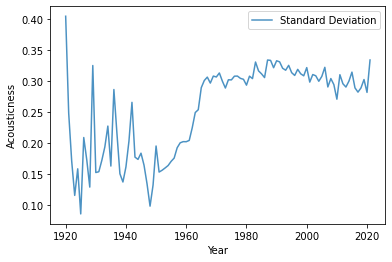

In [ ]:
plt.plot(spotify.groupby('year')['acousticness'].std(), alpha= 0.8, label= 'Standard Deviation')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Acousticness')
plt.show()

**Ao longo dos anos houve uma diminuição da acustica nas faixas produzidas**

Isso pode revelar uma aumento da relevância de componentes eletrônicos na produção das músicas, mesmo que, como podemos observar analisando o alto desvio padrão, componentes acusticos ainda são presentes.

### **3. danceability**

In [ ]:
spotify['danceability'].describe()

count    164305.000000
mean          0.533978
std           0.174782
min           0.055100
25%           0.412000
50%           0.543000
75%           0.662000
max           0.988000
Name: danceability, dtype: float64

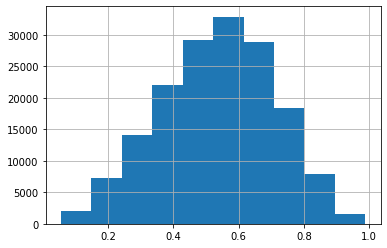

In [ ]:
spotify['danceability'].hist()

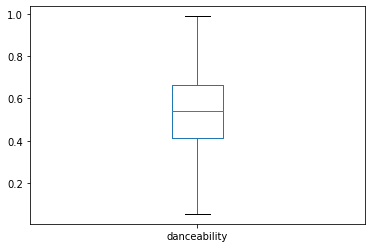

In [ ]:
spotify['danceability'].plot.box()

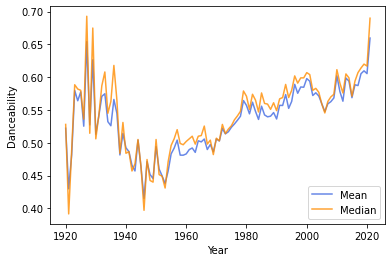

In [ ]:
plt.plot(spotify.groupby('year')['danceability'].mean(), color='royalblue',alpha=0.8, label='Mean')
plt.plot(spotify.groupby('year')['danceability'].median(), color='darkorange',alpha=0.8, label='Median')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Danceability')
plt.show()

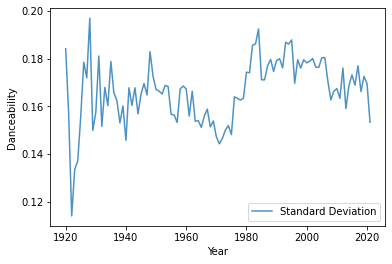

In [ ]:
plt.plot(spotify.groupby('year')['danceability'].std(), alpha= 0.8, label= 'Standard Deviation')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Danceability')
plt.show()

**Há uma tendência para produção de faixas mais dançantes**

Provavelmente isso tem grande influência dos novos ritmos que tem surgido e se tornado populares.

ex. *Funk, Eletronic e etc*

### **5. energy**

In [ ]:
spotify['energy'].describe()

count    164305.000000
mean          0.491634
std           0.269829
min           0.000020
25%           0.263000
50%           0.478000
75%           0.716000
max           1.000000
Name: energy, dtype: float64

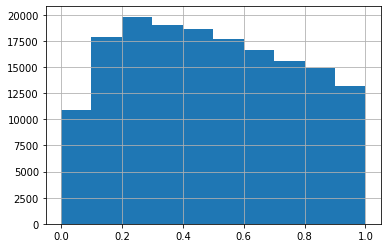

In [ ]:
spotify['energy'].hist()

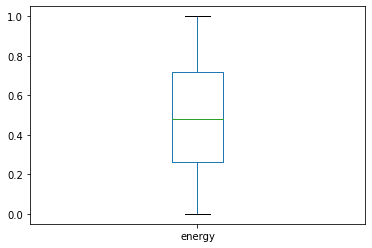

In [ ]:
spotify['energy'].plot.box()

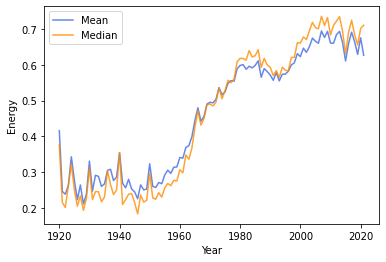

In [ ]:
plt.plot(spotify.groupby('year')['energy'].mean(), color='royalblue',alpha=0.8, label='Mean')
plt.plot(spotify.groupby('year')['energy'].median(), color='darkorange',alpha=0.8, label='Median')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Energy')
plt.show()

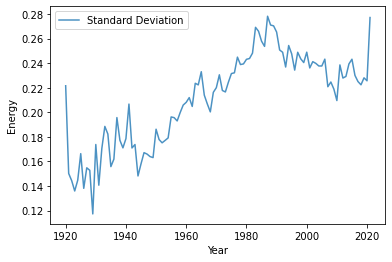

In [ ]:
plt.plot(spotify.groupby('year')['energy'].std(), alpha= 0.8, label= 'Standard Deviation')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Energy')
plt.show()

**As músicas tem se tornado mais intensas e energicas.**

### **6. explicit**

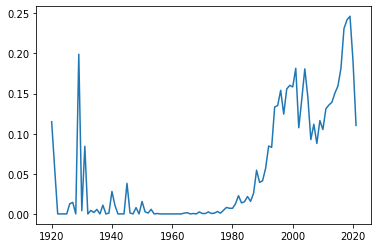

In [ ]:
plt.plot(spotify.groupby('year')['explicit'].mean())

**Houve um aumento na produção de faixas com conteúdo explicito, alcançando em 2020 cerca de 25% das produções.**

### **8. instrumentalness**

In [ ]:
spotify['instrumentalness'].describe()

count    164305.000000
mean          0.196535
std           0.332967
min           0.000000
25%           0.000001
50%           0.000648
75%           0.251000
max           0.999000
Name: instrumentalness, dtype: float64

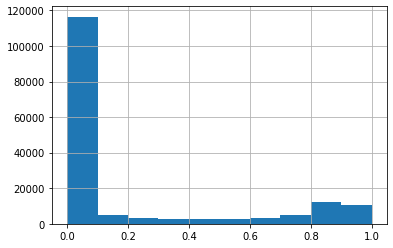

In [ ]:
spotify['instrumentalness'].hist()

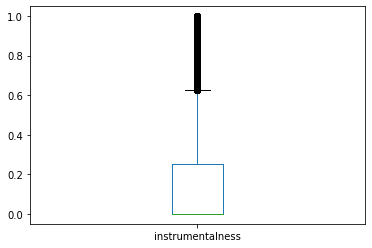

In [ ]:
spotify['instrumentalness'].plot.box()

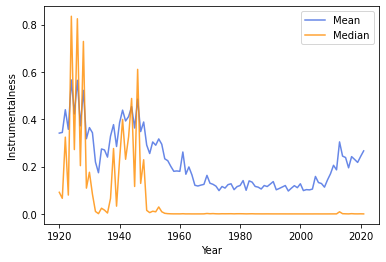

In [ ]:
plt.plot(spotify.groupby('year')['instrumentalness'].mean(), color='royalblue',alpha=0.8, label='Mean')
plt.plot(spotify.groupby('year')['instrumentalness'].median(), color='darkorange',alpha=0.8, label='Median')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Instrumentalness')
plt.show()

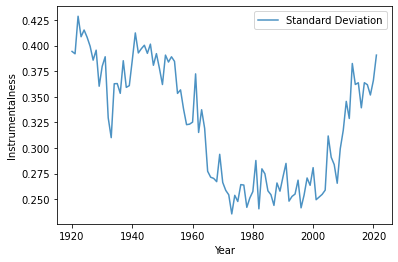

In [ ]:
plt.plot(spotify.groupby('year')['instrumentalness'].std(), alpha= 0.8, label= 'Standard Deviation')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Instrumentalness')
plt.show()

**Muito provavelmente ainda existem outliers relacionados a esse parâmetro**

Dado a grande diferença entre a média e a mediana e o alto desvio padrão, sabemos que os dados possuem valores muito discrepantes.

### **10. liveness**

In [ ]:
spotify['liveness'].describe()

count    164305.000000
mean          0.209561
std           0.180562
min           0.009670
25%           0.098600
50%           0.136000
75%           0.267000
max           1.000000
Name: liveness, dtype: float64

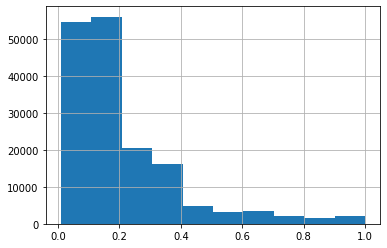

In [ ]:
spotify['liveness'].hist()

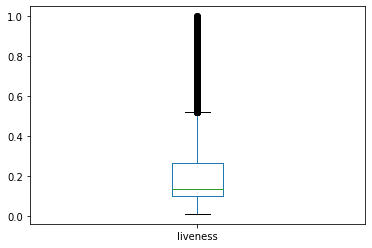

In [ ]:
spotify['liveness'].plot.box()

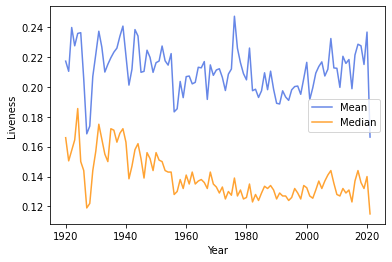

In [ ]:
plt.plot(spotify.groupby('year')['liveness'].mean(), color='royalblue',alpha=0.8, label='Mean')
plt.plot(spotify.groupby('year')['liveness'].median(), color='darkorange',alpha=0.8, label='Median')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Liveness')
plt.show()

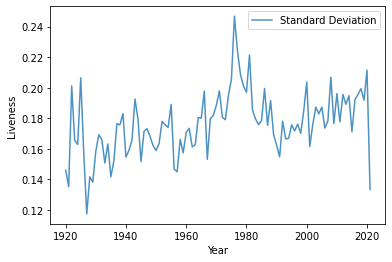

In [ ]:
plt.plot(spotify.groupby('year')['liveness'].std(), alpha= 0.8, label= 'Standard Deviation')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Liveness')
plt.show()

In [ ]:
spotify[spotify['liveness'] > 0.7]

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,artists,id,name,release_date
42,0.995000,0.534,176360,0.191,0,0.098200,7,0.805,0.737781,0,0,0.0508,70.059,0.6050,1920,['Mamie Smith & Her Jazz Hounds'],0sj3QeaCpacCfxL4c5TQBl,Mean Man,1920-01-01
188,0.994000,0.402,212333,0.161,0,0.000001,1,0.710,0.679774,1,0,0.0521,82.394,0.4510,1920,['Mistinguett'],5SY5AFYWfwwFbTKnmQKEsx,Mon Homme,1920-01-01
373,0.985000,0.370,153533,0.372,0,0.000681,2,0.929,0.671240,1,0,0.0865,159.669,0.7530,1922,['Ignacio Corsini'],0l3BQsVJ7F76wlN5QhJzaP,El Vendaval - Remasterizado,1922-03-21
385,0.974000,0.273,168107,0.318,0,0.163000,6,0.778,0.648391,1,0,0.0694,74.542,0.4140,1922,['Ignacio Corsini'],1KLKkACG16o5crQPiaF1Tz,Tus Suspiros - Remasterizado,1922-03-29
409,0.990000,0.543,130987,0.424,0,0.037900,5,0.861,0.651084,1,0,0.2690,68.567,0.6590,1922,['Ignacio Corsini'],2UU5t5j325ofKGcg7oUQNh,Sin Amor - Remasterizado,1922-03-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173956,0.004170,0.522,73523,0.931,0,0.007530,10,0.703,0.854295,0,1,0.2830,130.642,0.4720,2020,"['NWYR', 'Andrew Rayel']",4XpXwyVE0gtOxIypTi89YD,The Melody (FYHYM2019),2020-01-05
173958,0.893000,0.492,334765,0.264,0,0.004110,9,0.940,0.652979,1,0,0.0579,102.091,0.4760,2019,['Jorma Kaukonen'],1l6aOIBByjjIGRFwsUwDmg,Too Many Years - Late Show - Live,2019-07-26
174085,0.084900,0.787,148759,0.713,1,0.000000,7,0.717,0.857380,1,70,0.4010,175.046,0.7610,2020,['NLE Choppa'],44sYqNBttbXNxya33FJ3Dj,Camelot,2020-08-10
174108,0.000629,0.460,217339,0.993,0,0.775000,3,0.716,0.829677,0,14,0.3500,141.385,0.0589,2020,"['Starpicker', 'Billy Gillies']",0sxJdPUhjpb3dZlaDewEyu,Origins (Billy Gillies Remix) - Mixed,2020-12-28


**Existe uma predominância geral ao longo dos anos de faixas que não sejam gravadas ao vivo.**

Em sua grande maioria foram gravadas em estudios ou em locais reservados.

### **11. loudness**

In [ ]:
spotify['loudness'].describe()

count    164305.000000
mean          0.761462
std           0.082242
min           0.453935
25%           0.713993
50%           0.773268
75%           0.823538
max           0.998262
Name: loudness, dtype: float64

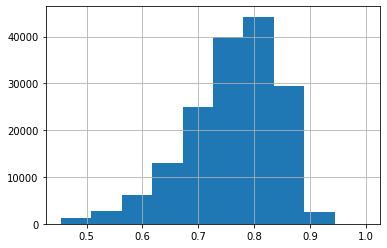

In [ ]:
spotify['loudness'].hist()

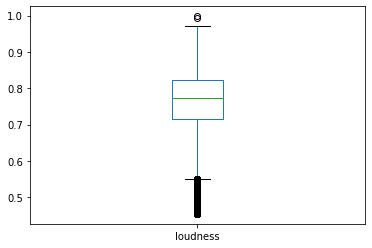

In [ ]:
spotify['loudness'].plot.box()

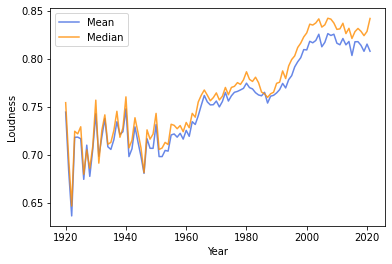

In [ ]:
plt.plot(spotify.groupby('year')['loudness'].mean(), color='royalblue',alpha=0.8, label='Mean')
plt.plot(spotify.groupby('year')['loudness'].median(), color='darkorange',alpha=0.8, label='Median')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Loudness')
plt.show()

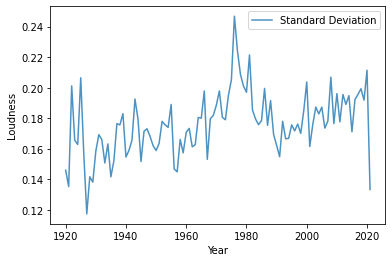

In [ ]:
plt.plot(spotify.groupby('year')['liveness'].std(), alpha= 0.8, label= 'Standard Deviation')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Loudness')
plt.show()

**As faixas passaram a ter volumes mais altos ao longo dos anos.**



### **14. popularity**

In [ ]:
spotify['popularity'].describe()

count    164305.000000
mean         26.831423
std          21.703830
min           0.000000
25%           3.000000
50%          27.000000
75%          43.000000
max         100.000000
Name: popularity, dtype: float64

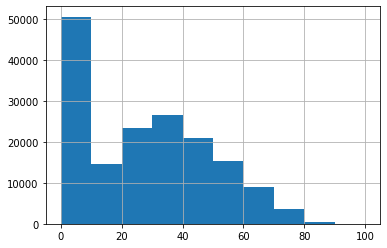

In [ ]:
spotify['popularity'].hist()

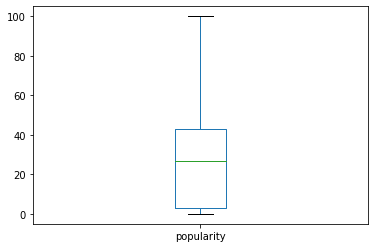

In [ ]:
spotify['popularity'].plot.box()

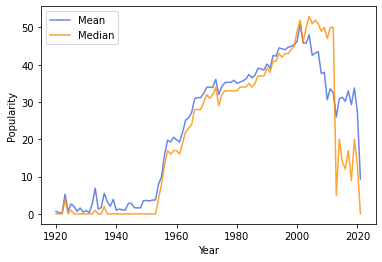

In [ ]:
plt.plot(spotify.groupby('year')['popularity'].mean(), color='royalblue',alpha=0.8, label='Mean')
plt.plot(spotify.groupby('year')['popularity'].median(), color='darkorange',alpha=0.8, label='Median')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()

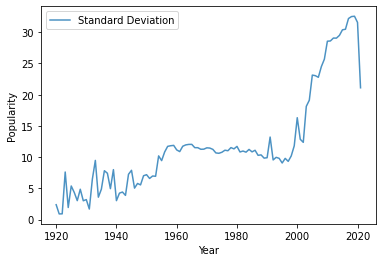

In [ ]:
plt.plot(spotify.groupby('year')['popularity'].std(), alpha= 0.8, label= 'Standard Deviation')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()

In [ ]:
spotify[spotify['popularity'] > 60].describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,11854.000000,11854.000000,1.185400e+04,11854.000000,11854.000000,11854.000000,11854.000000,11854.000000,11854.000000,11854.000000,11854.000000,11854.000000,11854.000000,11854.000000,11854.000000
mean,0.258845,0.618227,2.249718e+05,0.628160,0.258900,0.040074,5.204150,0.179418,0.822946,0.653619,68.109836,0.091620,121.414581,0.516309,2006.199173
std,0.278229,0.159594,6.937252e+04,0.206722,0.438049,0.157358,3.561277,0.142035,0.056794,0.475836,5.892947,0.096908,29.195736,0.243857,14.917882
min,0.000002,0.055100,3.764000e+04,0.000099,0.000000,0.000000,0.000000,0.015000,0.455281,0.000000,61.000000,0.022300,46.718000,0.000000,1933.000000
25%,0.029900,0.515000,1.888670e+05,0.491000,0.000000,0.000000,2.000000,0.093600,0.798481,0.000000,63.000000,0.034900,97.480750,0.325250,1999.000000
50%,0.147000,0.628000,2.183135e+05,0.649000,0.000000,0.000002,5.000000,0.122000,0.835455,1.000000,67.000000,0.049500,120.040500,0.512000,2012.000000
75%,0.421000,0.734000,2.527730e+05,0.790000,1.000000,0.000387,8.000000,0.222000,0.861013,1.000000,72.000000,0.098775,140.074500,0.715000,2017.000000
max,0.996000,0.980000,4.120258e+06,1.000000,1.000000,0.999000,11.000000,0.986000,0.960645,1.000000,100.000000,0.868000,214.025000,0.991000,2021.000000


**Muitas faixas são lançadas e muitas delas são impopulares.**

A diminuição repentina na média de populariade por ano coincide com o periodo de grande aumento na produção das faixas.

(Ver analise do id)


### **16. speechiness**

In [ ]:
spotify['speechiness'].describe()

count    164305.000000
mean          0.080442
std           0.114413
min           0.022200
25%           0.034900
50%           0.044500
75%           0.070400
max           0.971000
Name: speechiness, dtype: float64

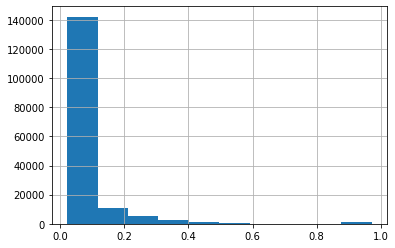

In [ ]:
spotify['speechiness'].hist()

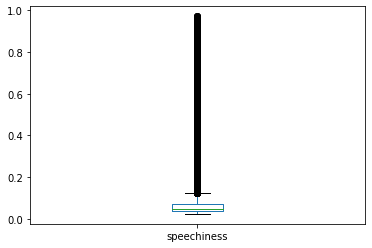

In [ ]:
spotify['speechiness'].plot.box()

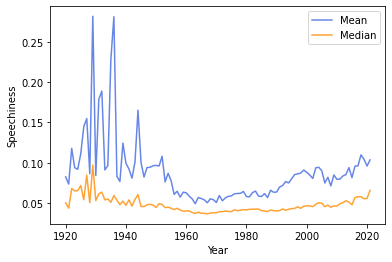

In [ ]:
plt.plot(spotify.groupby('year')['speechiness'].mean(), color='royalblue',alpha=0.8, label='Mean')
plt.plot(spotify.groupby('year')['speechiness'].median(), color='darkorange',alpha=0.8, label='Median')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Speechiness')
plt.show()

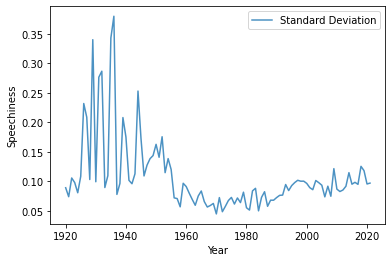

In [ ]:
plt.plot(spotify.groupby('year')['speechiness'].std(), alpha= 0.8, label= 'Standard Deviation')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Speechiness')
plt.show()

In [ ]:
spotify[spotify['speechiness'] > 0.6].describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,1884.000000,1884.000000,1.884000e+03,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000
mean,0.623143,0.654116,2.999396e+05,0.308090,0.212845,0.023640,5.271762,0.334989,0.663001,0.654459,6.394904,0.886582,105.480725,0.529184,1949.433121
std,0.290815,0.088706,2.698673e+05,0.181415,0.409428,0.123881,3.745832,0.236186,0.066076,0.475671,11.765775,0.101267,28.501048,0.182355,23.586617
min,0.000928,0.208000,9.570000e+04,0.007690,0.000000,0.000000,0.000000,0.038000,0.455203,0.000000,0.000000,0.601000,43.969000,0.025800,1920.000000
25%,0.389750,0.620750,1.549098e+05,0.191750,0.000000,0.000000,1.000000,0.154750,0.617814,0.000000,0.000000,0.863750,82.889000,0.410750,1935.000000
50%,0.701000,0.679000,2.142150e+05,0.253000,0.000000,0.000000,6.000000,0.254000,0.655501,1.000000,0.000000,0.936000,101.955000,0.548000,1940.000000
75%,0.870000,0.712000,3.280945e+05,0.367250,0.000000,0.000002,9.000000,0.412000,0.703852,1.000000,11.000000,0.953000,125.244000,0.660250,1954.000000
max,0.996000,0.975000,4.234947e+06,0.983000,1.000000,0.958000,11.000000,0.985000,0.922042,1.000000,73.000000,0.971000,209.763000,0.972000,2021.000000


**A proporção de fala nas faixas ao longo dos anos tem se mantido relativamente constante**

### **17. tempo**

In [ ]:
spotify['tempo'].describe()

count    164305.000000
mean        117.208761
std          29.726908
min          32.941000
25%          94.353000
50%         116.003000
75%         135.009000
max         224.437000
Name: tempo, dtype: float64

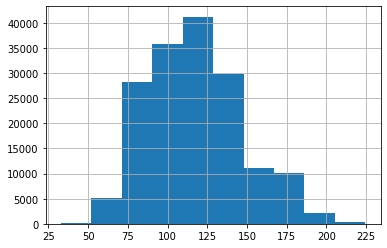

In [ ]:
spotify['tempo'].hist()

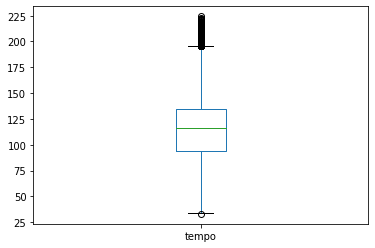

In [ ]:
spotify['tempo'].plot.box()

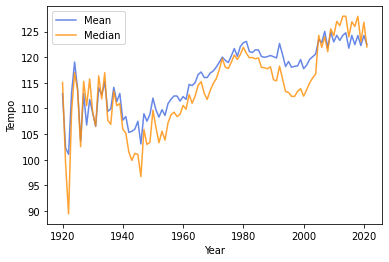

In [ ]:
plt.plot(spotify.groupby('year')['tempo'].mean(), color='royalblue',alpha=0.8, label='Mean')
plt.plot(spotify.groupby('year')['tempo'].median(), color='darkorange',alpha=0.8, label='Median')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Tempo')
plt.show()

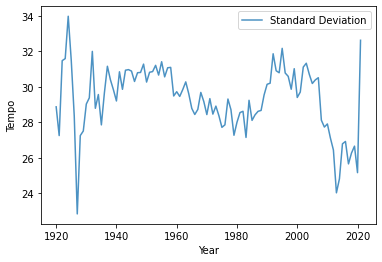

In [ ]:
plt.plot(spotify.groupby('year')['tempo'].std(), alpha= 0.8, label= 'Standard Deviation')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Tempo')
plt.show()

**As faixas tem, em média, apresentado um crescimento nas batidas por minuto.**

Isso tem relação com um ritmo mais acelerado nas músicas.

### **18. valence**

In [ ]:
spotify['valence'].describe()

count    164305.000000
mean          0.527256
std           0.265586
min           0.000000
25%           0.310000
50%           0.538000
75%           0.750000
max           1.000000
Name: valence, dtype: float64

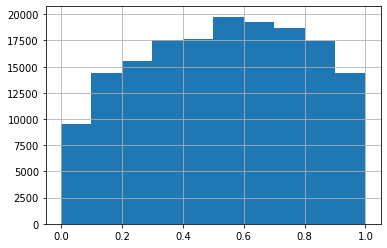

In [ ]:
spotify['valence'].hist()

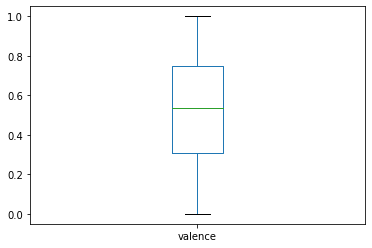

In [ ]:
spotify['valence'].plot.box()

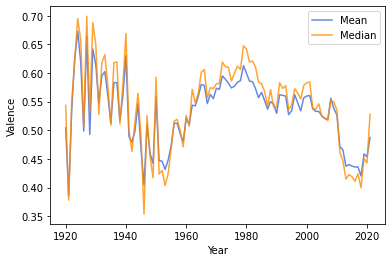

In [ ]:
plt.plot(spotify.groupby('year')['valence'].mean(), color='royalblue',alpha=0.8, label='Mean')
plt.plot(spotify.groupby('year')['valence'].median(), color='darkorange',alpha=0.8, label='Median')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Valence')
plt.show()

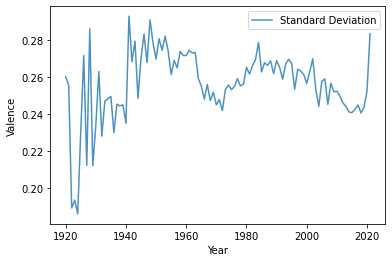

In [ ]:
plt.plot(spotify.groupby('year')['valence'].std(), alpha= 0.8, label= 'Standard Deviation')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Valence')
plt.show()

**As faixas apresentam um queda na positividade músical ao longo dos anos**

Isso significa uma menor presença de setimentos positivos como felicidade e alegria.

## Correlação da Popularidade com os Outros Parâmetros

In [ ]:
spotify.cov()['popularity']

acousticness          -3.535551
danceability           0.620051
duration_ms        -1933.534961
energy                 1.887672
explicit               1.170900
instrumentalness      -2.376111
key                    0.121173
liveness              -0.293487
loudness               0.584742
mode                   0.025128
popularity           471.056242
speechiness           -0.184856
tempo                 62.700018
valence                0.372302
year                 295.727489
Name: popularity, dtype: float64

In [ ]:
spotify.corr(method='pearson')['popularity']

acousticness       -0.426951
danceability        0.163454
duration_ms        -0.000624
energy              0.322331
explicit            0.232293
instrumentalness   -0.328798
key                 0.001593
liveness           -0.074891
loudness            0.327595
mode                0.002539
popularity          1.000000
speechiness        -0.074443
tempo               0.097181
valence             0.064588
year                0.523368
Name: popularity, dtype: float64

Observando as covariâncias e o método de correlação de pearson, os parâmetros que mais se relacionam com a popularidade são:

### **Antes: Categorizando popularity**

Essa categorização nos ajudará nas visualizações a seguir

In [ ]:
spotify_pop['pop_cut'] = pd.qcut(spotify_pop['popularity'],4)
spotify_pop['pop_cut'].value_counts()
spotify_pop['pop_cut'] = spotify_pop['pop_cut'].astype('category')

(3.0, 27.0]      41917
(-0.001, 3.0]    41583
(27.0, 43.0]     40635
(43.0, 100.0]    40170
Name: pop_cut, dtype: int64

### **1. acousticness x popularity**

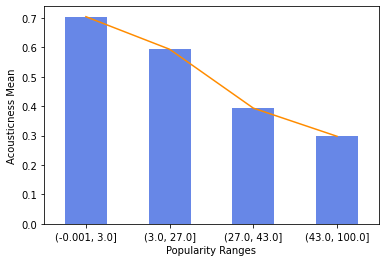

In [ ]:
spotify_pop.groupby('pop_cut')['acousticness'].mean().plot.bar(color='royalblue',alpha=0.8)
spotify_pop.groupby('pop_cut')['acousticness'].mean().plot(color= 'darkorange')
plt.xlabel('Popularity Ranges')
plt.ylabel('Acousticness Mean')
plt.show()

**A acustica das faixas diminui a medida que a popularidade aumenta.**

### **5. energy x popularity**

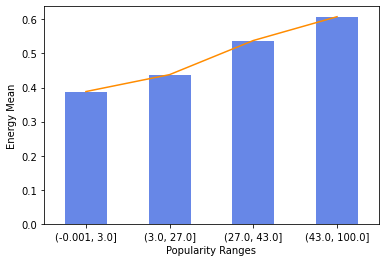

In [ ]:
spotify_pop.groupby('pop_cut')['energy'].mean().plot.bar(color='royalblue',alpha=0.8)
spotify_pop.groupby('pop_cut')['energy'].mean().plot(color= 'darkorange')
plt.xlabel('Popularity Ranges')
plt.ylabel('Energy Mean')
plt.show()

**Aqui podemos observar claramente uma relação positiva entre a energia e a popularidade das faixas**

### **6. explicit x popularity**

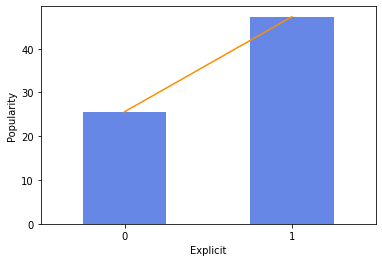

In [ ]:
spotify_pop.groupby('explicit')['popularity'].mean().plot.bar(color='royalblue',alpha=0.8)
spotify_pop.groupby('explicit')['popularity'].mean().plot(color= 'darkorange')
plt.xlabel('Explicit')
plt.ylabel('Popularity')
plt.show()

**Conteúdos explicitos são em média mais populares que conteúdos não explicitos**

### **8. instrumentalness x popularity**

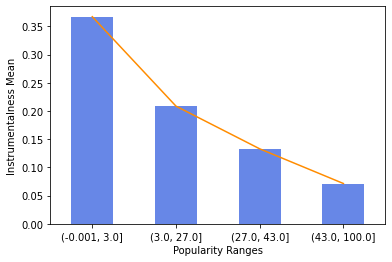

In [ ]:
spotify_pop.groupby('pop_cut')['instrumentalness'].mean().plot.bar(color='royalblue',alpha=0.8)
spotify_pop.groupby('pop_cut')['instrumentalness'].mean().plot(color= 'darkorange')
plt.xlabel('Popularity Ranges')
plt.ylabel('Instrumentalness Mean')
plt.show()

**As musicas mais populares em média apresentam conteúdo vocal**

### **11. loudness x popularity**

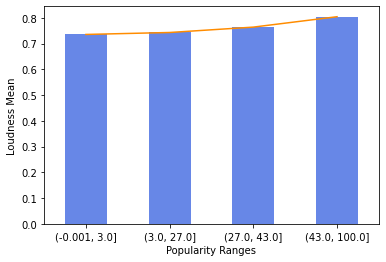

In [ ]:
spotify_pop.groupby('pop_cut')['loudness'].mean().plot.bar(color='royalblue',alpha=0.8)
spotify_pop.groupby('pop_cut')['loudness'].mean().plot(color= 'darkorange')
plt.xlabel('Popularity Ranges')
plt.ylabel('Loudness Mean')
plt.show()

**Mesmo que a covariancia entre popularidade e a altura em db apareça com um bom coeficiente nas covariâncias e em pearson, não observo uma relação relevante entre as duas variaveis. Há uma leve tendência de relação positiva.**

# **Teste de Hipótese**

## A Popularidade das Faixas Explicitas e Não Explicitas seguem a Mesma Distribuição. (Mann-Whitney U Test)

**Dividindo e Verificando os Dois Grupos**

Essa é uma verificação de dois grupos não pareados.

In [ ]:
explicit = spotify[spotify['explicit'] == 1]
not_explicit = spotify[spotify['explicit'] == 0]

In [ ]:
explicit['popularity'].describe()

count    9400.000000
mean       47.297766
std        23.057410
min         0.000000
25%        37.000000
50%        52.000000
75%        64.000000
max       100.000000
Name: popularity, dtype: float64

In [ ]:
not_explicit['popularity'].describe()

count    154905.000000
mean         25.589477
std          20.986242
min           0.000000
25%           3.000000
50%          26.000000
75%          41.000000
max          94.000000
Name: popularity, dtype: float64

**Buscando Outliers**

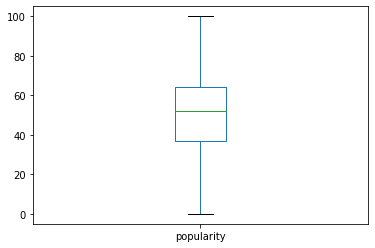

In [ ]:
explicit['popularity'].plot.box()

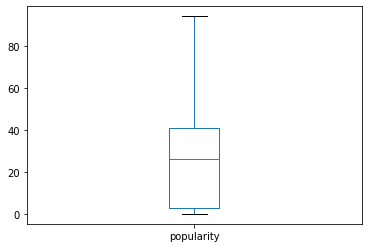

In [ ]:
not_explicit['popularity'].plot.box()

**Verificando se os grupos seguem a Normal**

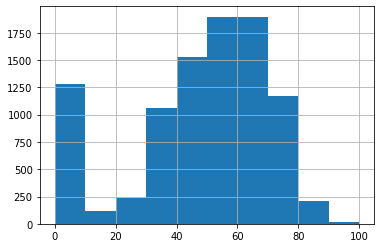

In [ ]:
explicit['popularity'].hist()

In [ ]:
#Teste de Normalidade D’Agostino’s K^2 (Shapiro não tem precisão para amostras com N > 5000)
stats.normaltest(explicit['popularity'])

NormaltestResult(statistic=835.1853068697171, pvalue=4.383438622712082e-182)

**explicit['popularity'] provavelmente segue uma gaussiana**

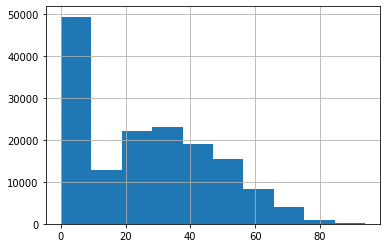

In [ ]:
not_explicit['popularity'].hist()

In [ ]:
#Teste de Normalidade D’Agostino’s K^2 (Shapiro não tem precisão para amostras com N > 5000)
stats.normaltest(not_explicit['popularity'])

NormaltestResult(statistic=26345.782417502152, pvalue=0.0)

**not_explicit['popularity'] provavelmente não segue uma gaussiana**

Melhor abordagem dada a situação é utilizar o Mann-Whitney U Test para verificar a hipotese.

In [ ]:
stats.mannwhitneyu(explicit['popularity'], not_explicit['popularity'])

MannwhitneyuResult(statistic=348038018.5, pvalue=0.0)

**Dado o resultado, podemos observar que essa hipotese é falsa**

Logo, a popularidade das faixas explicitas e não explicitas vem de distribuições diferentes.

# **Conclusões**

Durante o processo pude colocar em prática grande parte do que aprendi na disciplina e ainda observar alguns insigths interessantes sobre o mundo musical:

1. A tendência é que cada vez mais faixas sejam produzidas por ano.

2. Ao longo dos anos houve uma diminuição da acustica nas faixas produzidas.

3. Há uma tendência para produção de faixas mais dançantes.

4. As músicas tem se tornado mais intensas e energicas.

5. Houve um aumento na produção de faixas com conteúdo explicito, alcançando em 2020 cerca de 25% das produções.

6. Existe uma predominância geral ao longo dos anos de faixas que não sejam gravadas ao vivo.

7. As faixas passaram a ter volumes mais altos ao longo dos anos.

8. Atualmente muitas faixas são lançadas e em sua maioria elas são impopulares.

9. A proporção de fala nas faixas ao longo dos anos tem se mantido relativamente constante.

10. As faixas tem, em média, apresentado um crescimento nas batidas por minuto.

11. As faixas apresentam um queda na positividade músical ao longo dos anos.

12. A acustica das faixas diminui a medida que a popularidade aumenta.

13. Claramente existe uma relação positiva entre a energia e a popularidade das faixas.

14. Conteúdos explicitos são em média mais populares que conteúdos não explicitos.

15. As musicas mais populares em média apresentam conteúdo vocal.

16. Há uma diferença relevante entre a popularidade das faixas explicitas e não explicitas.

**Possiveis Futuros Ajustes:**

Ainda existem alguns outliers que precisam ser removidos.

Gostaria de ter tido mais tempo para realizar mais testes de Hipótese mas infelizmente não consegui.

Qualquer Problema em Relação a este Projeto, só entrar em contato com
accs2@cin.ufpe.br.